## Basics of Image processing and Convolution
Libraries used: cv2 , matplotlib and numpy

### Importing Images and Editing

In [1]:
import cv2

In [2]:
#Read
image = cv2.imread('img/image.jpg')

In [3]:
#Show, waitkey requires you to enter any key and then destroy is executed
cv2.imshow('Cool Computer Vision Pic(Color)',image)
cv2.waitKey()

13

In [4]:
# 3 cz of RGB channels
image.shape

(532, 850, 3)

Let us now convert this image to greyscale

In [5]:
#To edit pics
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow('Cool Computer Vision Pic(Gray Scale)',gray_img)
cv2.waitKey()
cv2.destroyAllWindows()

Note:
    We can also convert the image into grayscale while reading it itself by passing argument 0 along with imread().

To save pics

In [6]:
cv2.imwrite('img/output.jpg',gray_img)

True

Remember, opencv uses BGR order and matplotlib.pyplot or rest use RGB
Notice the difference in the array read by cv2 and plt
We can use 
<code> cvtColor('img',cv2.COLOR_BGR2RGB) <code>

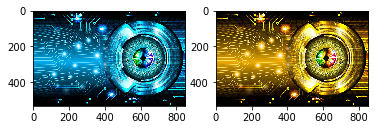

In [7]:
from matplotlib import pyplot as plt
import numpy as np
arr_matplt = np.array(plt.imread('img/image.jpg'))
fig = plt.figure()
a = fig.add_subplot(221)
plt.imshow(arr_matplt)
a = fig.add_subplot(222)
plt.imshow(image)

### Object Detection
We are going to use Haar Cascade CLassifier (which is provided by opencv).  
  
The complete repo is present at https://github.com/opencv/opencv/tree/master/data/haarcascades  
  
    
Let's first load an image and check.

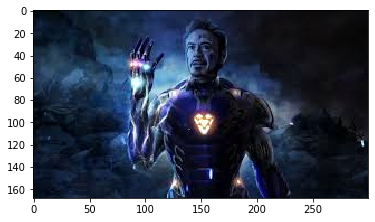

In [8]:
ironman = cv2.imread('img/ironman.jpeg')
cv2.imshow('Snap pic!',ironman)
cv2.waitKey()
cv2.destroyAllWindows()

#For ease, and incorporating in notebook, let's use matplotlib
plt.imshow(ironman)

In [9]:
# Lets load this face detection cascade classifier
classifier = cv2.CascadeClassifier('HaarCascade_FrontalFace/haarcascade_frontalface_default.xml')
face2D = classifier.detectMultiScale(ironman)
# [[131,20,33,33]] is the output

# We want face2D[0]
face = face2D[0]
x,y,w,h = face

# coordinates, width and height
face_in_pic = ironman[y : y + h, x : x + w]

Face according to the classifier in our image.


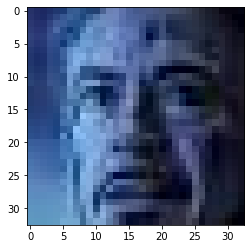

In [10]:
cv2.imshow('Face',face_in_pic)
cv2.waitKey()
cv2.destroyAllWindows()
#For ease, and incorporating in notebook, let's use matplotlib
plt.imshow(face_in_pic)

Let's show this in the original image itself  
For this we use  
<code> cv2.rectangle(img, (x,y), (x+w,y+h), colour_of_box_coordinates, thickness)

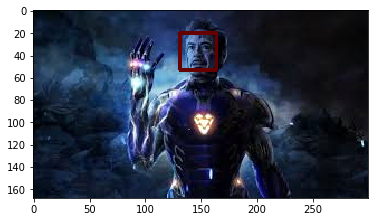

In [11]:
face_detect_orig_img = cv2.rectangle(ironman,(x,y),(x+w,y+h), (100,0,0),2)
cv2.imshow('Final img',face_detect_orig_img)
cv2.waitKey()
cv2.destroyAllWindows()
#For ease, and incorporating in notebook, let's use matplotlib
plt.imshow(face_detect_orig_img)

### Live Video Stream
Please run vidcap.py. 

### Convolutions
Note:
Implementation without the use of library.

In [12]:
import numpy as np

In [13]:
# Vertical and Horizontal Filters
vert = np.array(([1,0,-1],[1,0,-1],[1,0,-1]))
hori = np.array(([1,1,1],[0,0,0],[-1,-1,-1]))
stride = 1

In [14]:
#Using grey scale for simplicity
im_arr = np.array(gray_img)
im_arr = im_arr.astype(np.float32)
im_arr.shape

(532, 850)

In [15]:
# Vertical edge detection, no padding
lst = []
for i in range(im_arr.shape[0] - vert.shape[0]+1):
    for j in range(im_arr.shape[1] - vert.shape[1]+1):
        temp_sum = im_arr[i:i+3,j:j+3] * vert
        k = np.sum(temp_sum)
        lst.append(k)

In [16]:
new_im_vert = np.array(lst).reshape((im_arr.shape[0] - vert.shape[0]+1,im_arr.shape[1] - vert.shape[1]+1))

In [17]:
# Horizontal edge detection, no padding
lst = []
for i in range(im_arr.shape[0] - hori.shape[0]+1):
    for j in range(im_arr.shape[1] - hori.shape[1]+1):
        temp_sum = im_arr[i:i+3,j:j+3] * hori
        k = np.sum(temp_sum)
        lst.append(k)

In [18]:
new_im_hori = np.array(lst).reshape((im_arr.shape[0] - hori.shape[0]+1,im_arr.shape[1] - hori.shape[1]+1))

In [19]:
cv2.imshow('Filtered image(Vertical)',new_im_vert)
cv2.waitKey()
cv2.imshow('Filtered image(Horizontal)',new_im_hori)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('img/verfil.jpg',new_im_vert)
cv2.imwrite('img/horfil.jpg',new_im_hori)

True

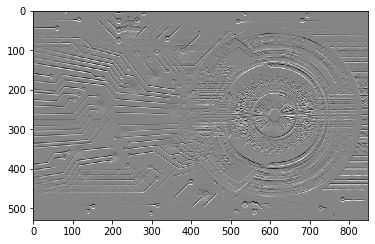

In [20]:
plt.imshow(new_im_hori,cmap='gray')

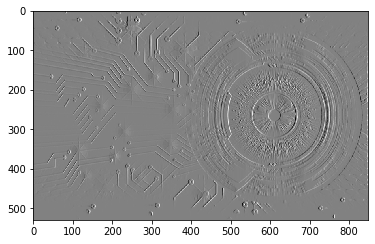

In [21]:
plt.imshow(new_im_vert,cmap='gray')

The images saved in 'img' folder are clearer.